In [1]:
import pandas as pd
import numpy as np
import sklearn
import mlxtend

In [13]:
df = pd.read_excel('Lab_exercises/Lab-topic-7-association-rules/Online-Retail-France.xlsx')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0
4,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0
...,...,...,...,...,...,...,...
8552,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0
8553,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0
8554,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0
8555,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0


In [19]:
df["Description"].nunique()

1565

In [24]:
df["Description"] = [ x.strip() for x in df["Description"]]
df["Description"].nunique()


1564

In [26]:
df["InvoiceNo"].isna().value_counts()

InvoiceNo
False    8557
Name: count, dtype: int64

In [36]:
df = df[[not x.startswith("C") for x in df['InvoiceNo']]]
df.shape

(8408, 7)

In [69]:
df = df[[not "POSTAGE" in x for x in df['Description']]]
df.shape

(8108, 7)

In [77]:
basket = (df
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo')) # in this way, InvoiceNo is not a column anymore
display(basket.describe())
basket =basket.astype(bool)
display(basket.describe())

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,...,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,0.868217,0.310078,0.005168,0.062016,0.509044,0.385013,0.400517,0.062016,0.281654,0.186047,...,0.193798,0.023256,0.010336,0.002584,0.082687,0.279070,0.012920,0.186047,0.031008,0.062016
std,5.109242,2.474110,0.101666,0.861544,5.445138,2.978173,3.454711,1.219989,2.006660,1.484466,...,2.195417,0.340644,0.203331,0.050833,1.626651,2.348994,0.254164,1.922464,0.609994,0.861544
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,48.000000,20.000000,2.000000,12.000000,96.000000,24.000000,48.000000,24.000000,24.000000,12.000000,...,25.000000,6.000000,4.000000,1.000000,32.000000,36.000000,5.000000,24.000000,12.000000,12.000000


Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
count,387,387,387,387,387,387,387,387,387,387,...,387,387,387,387,387,387,387,387,387,387
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,375,381,386,385,381,380,380,386,378,381,...,384,385,386,386,386,380,386,383,386,385


In [81]:
min_lift = 1
min_support = 1
min_number = 20
from mlxtend.frequent_patterns import apriori, association_rules
rules = []
while len(rules) < 20:
    frequent_itemsets = apriori(basket, min_support=min_support, use_colnames=True)
    if(len(frequent_itemsets) !=0):
        rules = association_rules(frequent_itemsets, metric="lift", min_threshold=min_lift)
 
    min_support -=0.01
display(min_support)
display(rules.shape)
display(frequent_itemsets.shape)



0.06999999999999926

(20, 14)

(41, 2)

In [61]:
min_lift = 1
min_support = 1
min_number = 20
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets = apriori(basket, min_support=0.14, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,"((Description, ))","((Quantity, 570672))",1.000000,0.165813,0.165813,0.165813,1.000000,1.0,0.000000,1.0,0.0,0.165813,0.0,0.582907
1,"((Quantity, 570672))","((Description, ))",0.165813,1.000000,0.165813,1.000000,1.000000,1.0,0.000000,inf,0.0,0.165813,0.0,0.582907
2,"((Description, ))","((UnitPrice, 570672))",1.000000,0.165813,0.165813,0.165813,1.000000,1.0,0.000000,1.0,0.0,0.165813,0.0,0.582907
3,"((UnitPrice, 570672))","((Description, ))",0.165813,1.000000,0.165813,1.000000,1.000000,1.0,0.000000,inf,0.0,0.165813,0.0,0.582907
4,"((Description, ))","((CustomerID, 570672))",1.000000,0.165813,0.165813,0.165813,1.000000,1.0,0.000000,1.0,0.0,0.165813,0.0,0.582907
5,"((CustomerID, 570672))","((Description, ))",0.165813,1.000000,0.165813,1.000000,1.000000,1.0,0.000000,inf,0.0,0.165813,0.0,0.582907
6,"((UnitPrice, 570672))","((Quantity, 570672))",0.165813,0.165813,0.165813,1.000000,6.030888,1.0,0.138319,inf,1.0,1.000000,1.0,1.000000
7,"((Quantity, 570672))","((UnitPrice, 570672))",0.165813,0.165813,0.165813,1.000000,6.030888,1.0,0.138319,inf,1.0,1.000000,1.0,1.000000
8,"((CustomerID, 570672))","((Quantity, 570672))",0.165813,0.165813,0.165813,1.000000,6.030888,1.0,0.138319,inf,1.0,1.000000,1.0,1.000000
9,"((Quantity, 570672))","((CustomerID, 570672))",0.165813,0.165813,0.165813,1.000000,6.030888,1.0,0.138319,inf,1.0,1.000000,1.0,1.000000


In [82]:
sorted = rules.sort_values(["lift","confidence"],ascending=False).reset_index(drop= True)
sorted

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.095607,0.098191,0.080103,0.837838,8.532717,1.0,0.070716,5.561154,0.976129,0.704545,0.820181,0.826814
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.098191,0.095607,0.080103,0.815789,8.532717,1.0,0.070716,4.909561,0.978926,0.704545,0.796316,0.826814
2,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER PLATES),0.103359,0.129199,0.100775,0.975000,7.546500,1.0,0.087421,34.832041,0.967487,0.764706,0.971291,0.877500
3,(SET/6 RED SPOTTY PAPER PLATES),"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",0.129199,0.103359,0.100775,0.780000,7.546500,1.0,0.087421,4.075640,0.996196,0.764706,0.754640,0.877500
4,"(SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...",(SET/6 RED SPOTTY PAPER CUPS),0.103359,0.139535,0.100775,0.975000,6.987500,1.0,0.086353,34.418605,0.955664,0.709091,0.970946,0.848611
5,(SET/6 RED SPOTTY PAPER CUPS),"(SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...",0.139535,0.103359,0.100775,0.722222,6.987500,1.0,0.086353,3.227907,0.995842,0.709091,0.690202,0.848611
6,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.129199,0.139535,0.124031,0.960000,6.880000,1.0,0.106003,21.511628,0.981454,0.857143,0.953514,0.924444
7,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.139535,0.129199,0.124031,0.888889,6.880000,1.0,0.106003,7.837209,0.993243,0.857143,0.872404,0.924444
8,"(SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOT...",(SET/20 RED RETROSPOT PAPER NAPKINS),0.124031,0.134367,0.100775,0.812500,6.046875,1.0,0.084110,4.616710,0.952802,0.639344,0.783396,0.781250
9,(SET/20 RED RETROSPOT PAPER NAPKINS),"(SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOT...",0.134367,0.124031,0.100775,0.750000,6.046875,1.0,0.084110,3.503876,0.964179,0.639344,0.714602,0.781250


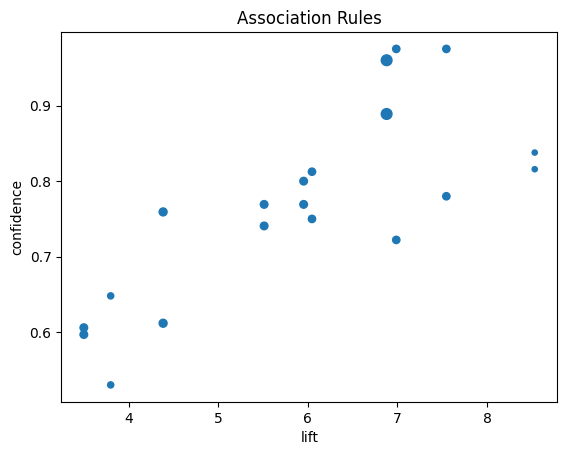

In [83]:
import matplotlib.pyplot as plt

sorted.plot.scatter(x='lift',y='confidence',s=3**(sorted['support']*30),title='Association Rules');